# Stori Data Science Challenge
Christian Jaffé Alarcón Acosta

## About the dataset

We'll be working on a fake credit card dataset at a customer level with 22 behavioral variables

| Variable                         | Description                                                                                                       |
| :------------------------------- | :---------------------------------------------------------------------------------------------------------------- |
| CUST_ID                          | Identification of Credit Card holder (Categorical)                                                                |
| BALANCE                          | Balance amount left in their account to make purchases                                                            |
| BALANCE_FREQUENCY                | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)   |
| PURCHASES                        | Amount of purchases made from account                                                                             |
| ONEOFF_PURCHASES                 | Maximum purchase amount done in one-go                                                                            |
| INSTALLMENTS_PURCHASES           | Amount of purchase done in installment                                                                            |
| CASH_ADVANCE                     | Cash in advance given by the user                                                                                 |
| PURCHASES_FREQUENCY              | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY         | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)         |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)              |
| CASHADVANCEFREQUENCY             | How frequently the cash in advance being paid                                                                     |
| CASHADVANCETRX                   | Number of Transactions made with "Cash in Advanced"                                                               |
| PURCHASES_TRX                    | Number of purchase transactions made                                                                              |
| CREDIT_LIMIT                     | Limit of Credit Card for user                                                                                     |
| PAYMENTS                         | Amount of Payment done by user                                                                                    |
| MINIMUM_PAYMENTS                 | Minimum amount of payments made by user                                                                           |
| PRCFULLPAYMENT                   | Percent of full payment paid by user                                                                              |
| TENURE                           | Tenure of credit card service for user                                                                            |
| ACTIVATED_DATE                | Date of activation                                                |
| LAST_PAYMENT_DATE                     | Date of the last payment                                                                                      |
| FRAUD                           | Binary variable that indicates fraud or not                                                       |

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Import XGBoost
try:
    from xgboost import XGBClassifier
except ImportError:
    XGBClassifier = None

# Import classes from model_utils.py
from model_utils import FraudModelTrainer, create_preprocessor

import warnings    
warnings.filterwarnings("ignore")    

In [2]:
from  model_utils import read_dataset
df = read_dataset('data_stori.csv', file_type='csv', index_col=0)

Dataset loaded successfully from 'data_stori.csv' with shape: (8950, 21)


In [3]:
# Load the CSV file into a DataFrame
#file_path = 'data_stori.csv'  #  CSV file path
#df = pd.read_csv(file_path, index_col=0, parse_dates=True)

## Overview of the Dataset

In [4]:
df['fraud'].value_counts()

fraud
0    8880
1      70
Name: count, dtype: int64

In [5]:
df.shape

(8950, 21)

In [6]:
df.head()

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, 1 to 8950
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_advanc

In [8]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


In [9]:
#Overview

df_overview = []
columns = df . columns . drop("cust_id")
for i in columns : 
    types = df[i] . dtypes
    unique_data = df[i] . nunique()
                   
    missing_count=df[i].isnull().sum() 
    value_count= df[i].isnull().count() 
    missing_percentage= round(missing_count/value_count*100,2)
        
    duplicated= df.duplicated().sum()    
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])
        
df_info = pd . DataFrame (df_overview)
df_info . columns =['variable' , 'type' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'gray', axis = 0)

,variable,type,unique_data,missing value,missing percentage,duplicated
0,activated_date,object,300,13,0.150000,0
1,last_payment_date,object,200,9,0.100000,0
2,balance,float64,8869,2,0.020000,0
3,balance_frequency,float64,43,0,0.000000,0
4,purchases,float64,6203,0,0.000000,0
5,oneoff_purchases,float64,4014,0,0.000000,0
6,installments_purchases,float64,4452,0,0.000000,0
7,cash_advance,float64,4267,112,1.250000,0
8,purchases_frequency,float64,47,0,0.000000,0
9,oneoff_purchases_frequency,float64,47,0,0.000000,0


From the overview of the dataset we can find useful that we have a dataset with a dimension of 8950 rows and 21 columns, with missing values in som variables.

## Question 1

### 1.1 Plot an histogram of the balance amount for all the customers.

For plotting the histogram of balance, we're going to use seaborn library


1.1 Histogram of 'balance' generated.


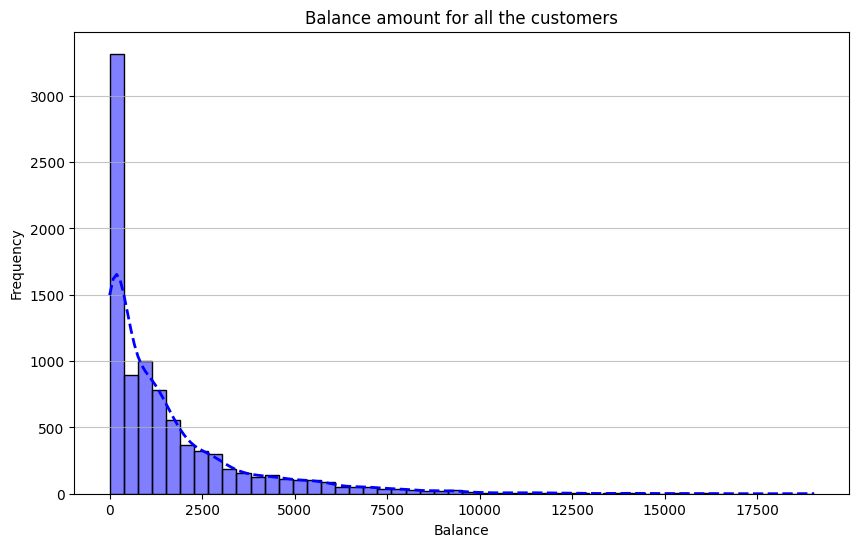

In [10]:
# 1.1 Plot histogram of 'balance'
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], bins=50, kde=True, color="blue", 
             line_kws={'linestyle': 'dashed', 'linewidth': 2})

plt.title('Balance amount for all the customers') 
plt.xlabel('Balance') 
plt.ylabel('Frequency') 
plt.grid(axis='y', alpha=0.75)
print("\n1.1 Histogram of 'balance' generated.") 

### 1.2 Report any structure you find and any hypotheses you have about that structure.

**Observing the histogram:**

* The balance distribution is strongly skewed to the right (positively).
* The vast majority of customers have low balances, concentrated near zero.
* There are some customers with very high balances (outliers), which extend the right tail of the distribution.

**Hypotheses about the structure:**

1.  **Majority Low Balance Customers:** The structure could indicate that most customers use the card for small purchases or pay off their balance almost completely on a regular basis.
2.  **High Indebtedness Segment:** The high balance outliers could represent a segment of customers with higher indebtedness, intensive credit use, or potential payment problems.
3.  **Possible Zero or Near-Zero Balance:** There might be a concentration of balances exactly at zero (or very close) if many customers pay their total balance or do not actively use the card. (Note: The initial histogram might not clearly show a peak at zero if the bins are wide, but the concentration near zero is evident).

**Logaritmic Transformation:**

* We can apply a logarithmic transformation to the balance (adding 1 to avoid log(0)) and replot the histogram. This could help to better visualize the structure in the lower and middle ranges, which are compressed in the original scale.

Column 'balance_log' created with the transformation log(1 + balance).


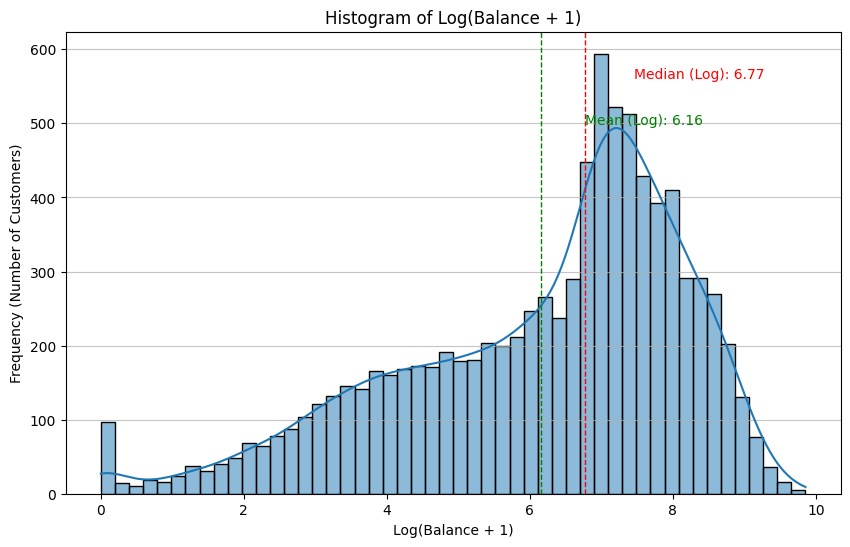

In [11]:
# Apply Logarithmic Transformation
# We use np.log1p which calculates log(1 + x), handling zeros correctly.
df['balance_log'] = np.log1p(df['balance'])
print("Column 'balance_log' created with the transformation log(1 + balance).")

# Plot the Log-Transformed Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['balance_log'], bins=50, kde=True)
plt.title('Histogram of Log(Balance + 1)')
plt.xlabel('Log(Balance + 1)')
plt.ylabel('Frequency (Number of Customers)')
plt.grid(axis='y', alpha=0.75)

# Add mean and median lines for the transformed data
log_median = df['balance_log'].median()
log_mean = df['balance_log'].mean()
plt.axvline(log_median, color='red', linestyle='dashed', linewidth=1)
plt.axvline(log_mean, color='green', linestyle='dashed', linewidth=1)
min_ylim_log, max_ylim_log = plt.ylim() # Get Y-axis limits to position text
plt.text(log_median*1.1, max_ylim_log*0.9, f'Median (Log): {log_median:.2f}', color='red')

# Adjust position of mean text if it's too close to the median
mean_text_x = log_mean*0.9 if abs(log_mean - log_median) < (df['balance_log'].std() * 0.1) else log_mean*1.1
plt.text(mean_text_x, max_ylim_log*0.8, f'Mean (Log): {log_mean:.2f}', color='green')

plt.show()

**Interpretation of the Log-Transformed Histogram**

- The logarithmic transformation has significantly reduced the right skewness.
- The distribution now more closely resembles a normal distribution, although some asymmetry or multimodality might still be present.
- The concentration of customers around certain balance values (on the log scale) can be seen more clearly. For example, the main peak is more defined.
- A notable peak near 0 on the log scale corresponds to original balances close to 0 (log(1+0)=0).
- This view reinforces the hypothesis of a large mass of customers with low balances, but allows for better analysis of the structure within that group and how intermediate balances are distributed.

In [12]:
df = read_dataset('data_stori.csv', file_type='csv', index_col=0)  #Re read the data to avoid possible confusions

Dataset loaded successfully from 'data_stori.csv' with shape: (8950, 21)


### 1.3 Report mean and median balance, grouped by year and month of ​activated_date.​

In [13]:
# Make a copy to avoid modifying the original DataFrame used in other questions
df_q1 = df.copy()

# Convert 'activated_date' to datetime
if not pd.api.types.is_datetime64_any_dtype(df_q1['activated_date']):
    df_q1['activated_date'] = pd.to_datetime(df_q1['activated_date'], errors='coerce')
    df_q1 = df_q1.dropna(subset=['activated_date']) # Re-apply dropna if conversion happens

# Extract year and month
if 'activation_year' not in df_q1.columns:
    df_q1['activation_year'] = df_q1['activated_date'].dt.year
if 'activation_month' not in df_q1.columns:
     df_q1['activation_month'] = df_q1['activated_date'].dt.month

# Group and calculate mean and median
balance_grouped = df_q1.groupby(['activation_year', 'activation_month'])['balance'].agg(['mean', 'median'])

# Format the output for clarity
balance_grouped = balance_grouped.rename(columns={'mean': 'Mean Balance', 'median': 'Median Balance'})
balance_grouped.index.names = ['Activation Year', 'Activation Month']


# Apply styling using the new English column names
styled_table = balance_grouped.style.format({
     'Mean Balance': '{:,.2f}',
     'Median Balance': '{:,.2f}'
 }).set_caption("Mean and Median Balance by Activation Date")

styled_table

**Interpretation of Results**

* **Downward Trend Observed:** There is a noticeable **downward trend** in both the **`Mean Balance`** and **`Median Balance`** for customer cohorts based on their activation month, progressing from late 2019 into mid-2020.
    * Customers activating earlier (e.g., Oct-Dec 2019) generally show higher average and median balances compared to those activating later (e.g., May-Jul 2020).

* **Consistent Right Skewness:** For **every** activation month cohort presented, the **`Mean Balance` is significantly higher than the `Median Balance`**.
    * This confirms that the `balance` distribution remains **right-skewed** even when looking at customers who activated around the same time.
    * It indicates the presence of some customers with relatively high balances within each group, pulling the mean upwards compared to the median (which represents a more typical customer).

#### Potential Hypotheses for the Trend:

* **Changing Customer Profile/Policy:** The trend could reflect changes in the customer segments acquired over this period or adjustments in initial credit policies (e.g., lower starting `credit_limit`s for newer cohorts).
* **Tenure Effect:** Customers activating later naturally have a shorter observed tenure within the dataset's timeframe, potentially having had less time to accumulate higher balances.
* **External Factors:** Economic conditions or specific events during late 2019 - mid 2020 might have influenced spending and balance patterns for newly acquired customers.

## Question 2

#### 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: ​cust_id (excluding letters), ​activated_date (in format YYYY-MM), ​last_payment_date (in format YYYY-MM-DD), ​cash_advance​, ​credit_limit​, and a calculated field of ​cash_advance​ as a percentage of ​credit_limit​.

In [14]:
# Make a copy to avoid modifying the original DataFrame used in other questions
df_q2 = df.copy()

# Data Preparation 

# Convert 'last_payment_date' to datetime objects
# Use errors='coerce' to turn invalid date formats into NaT (Not a Time)
df_q2['last_payment_date'] = pd.to_datetime(df_q2['last_payment_date'], errors='coerce')

# Ensure 'activated_date' is also datetime
if not pd.api.types.is_datetime64_any_dtype(df_q2['activated_date']):
    df_q2['activated_date'] = pd.to_datetime(df_q2['activated_date'], errors='coerce')

# Remove rows where either date conversion failed (resulted in NaT)
rows_before_dropna = df_q2.shape[0]
df_q2.dropna(subset=['activated_date', 'last_payment_date'], inplace=True)
rows_after_dropna = df_q2.shape[0]
if rows_after_dropna < rows_before_dropna:
    print(f"Removed {rows_before_dropna - rows_after_dropna} rows with invalid dates.")

# Extract activation year and last payment year
# Ensure these columns exist or create them
if 'activation_year' not in df_q2.columns:
  df_q2['activation_year'] = df_q2['activated_date'].dt.year
df_q2['last_payment_year'] = df_q2['last_payment_date'].dt.year


Removed 22 rows with invalid dates.


In [15]:
# Filtering
# Filter for customers activated AND last payment in 2020
customers_2020 = df_q2[(df_q2['activation_year'] == 2020) & (df_q2['last_payment_year'] == 2020)].copy() # Using .copy() to avoid SettingWithCopyWarning later

print(f"Found {customers_2020.shape[0]} customers who activated and had last payment in 2020.")


Found 6300 customers who activated and had last payment in 2020.


In [16]:
# Column Transformation and Selection

if not customers_2020.empty:
    # Clean 'cust_id': Removing letters (assuming 'C' prefix) and convert to numeric
    # Using .loc to modify the DataFrame slice directly and safely
    customers_2020.loc[:, 'cust_id_numeric'] = customers_2020['cust_id'].str.replace('C', '', regex=False)
    customers_2020.loc[:, 'cust_id_numeric'] = pd.to_numeric(customers_2020['cust_id_numeric'], errors='coerce')
    # Handle potential non-numeric IDs if replace didn't cover all cases
    customers_2020.dropna(subset=['cust_id_numeric'], inplace=True)
    customers_2020.loc[:, 'cust_id_numeric'] = customers_2020['cust_id_numeric'].astype(int) # Convert to integer


    # Format 'activated_date' to YYYY-MM
    customers_2020.loc[:, 'activated_date_formatted'] = customers_2020['activated_date'].dt.strftime('%Y-%m')

    # Format 'last_payment_date' to YYYY-MM-DD
    customers_2020.loc[:, 'last_payment_date_formatted'] = customers_2020['last_payment_date'].dt.strftime('%Y-%m-%d')

    # Calculate 'cash_advance' as a percentage of 'credit_limit'
    # Handle potential division by zero or NA in credit_limit
    # Ensure credit_limit and cash_advance are numeric, fill NA if necessary for calculation
    customers_2020['credit_limit'] = pd.to_numeric(customers_2020['credit_limit'], errors='coerce').fillna(0) # Fill NA credit limit with 0 for calculation safety
    customers_2020['cash_advance'] = pd.to_numeric(customers_2020['cash_advance'], errors='coerce').fillna(0) # Fill NA cash advance with 0

    customers_2020.loc[:, 'cash_advance_percentage'] = np.where(
        customers_2020['credit_limit'] > 0,
        (customers_2020['cash_advance'] / customers_2020['credit_limit']) * 100,
        0 # Assign 0% if credit_limit is 0 or missing (already filled NA with 0)
        # Alternatively, could assign np.nan: np.where(..., ..., np.nan)
    )

    # Select and rename the required columns for the final report
    report_table = customers_2020[[
        'cust_id_numeric',
        'activated_date_formatted',
        'last_payment_date_formatted',
        'cash_advance',
        'credit_limit',
        'cash_advance_percentage'
    ]].rename(columns={
        'cust_id_numeric': 'Customer ID (Numeric)',
        'activated_date_formatted': 'Activation Date (YYYY-MM)',
        'last_payment_date_formatted': 'Last Payment Date (YYYY-MM-DD)',
        'cash_advance': 'Cash Advance',
        'credit_limit': 'Credit Limit',
        'cash_advance_percentage': 'Cash Advance % of Limit'
    })
else:
    print("\nNo customers found matching the criteria (activated and last payment in 2020).")


In [17]:
print(f"Generated a table with {report_table.shape[0]} rows and {report_table.shape[1]} columns.")

report_table.head(10)


Generated a table with 6300 rows and 6 columns.


,Customer ID (Numeric),Activation Date (YYYY-MM),Last Payment Date (YYYY-MM-DD),Cash Advance,Credit Limit,Cash Advance % of Limit
2634,12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
2635,12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
2636,12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
2637,12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
2638,12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
2639,12715,2020-01,2020-10-16,0.000000,4000.0,0.000000
2640,12716,2020-01,2020-05-06,2260.735690,9000.0,25.119285
2641,12717,2020-01,2020-08-13,611.974158,3500.0,17.484976
2642,12718,2020-01,2020-08-28,0.000000,9000.0,0.000000
2643,12719,2020-01,2020-07-15,4200.991254,9000.0,46.677681


To generate the required table for customers active in 2020, the following steps were performed using pandas:

1.  **Loaded Data & Parsed Dates:** The dataset was loaded, and `activated_date` and `last_payment_date` were converted to datetime objects.
2.  **Filtered Cohort:** The DataFrame was filtered to include only customers where the **year** of both `activated_date` AND `last_payment_date` was 2020.
3.  **Cleaned & Formatted Data:**
    * `cust_id` was cleaned to retain only numeric characters.
    * `activated_date` was formatted to `YYYY-MM`.
    * `last_payment_date` was formatted to `YYYY-MM-DD`.
4.  **Calculated Ratio:**
    * The `cash_advance / credit_limit` ratio was calculated as a percentage.
    * Missing `cash_advance` values were treated as 0 for this calculation.
    * Cases where `credit_limit` was 0 or missing resulted in an 'N/A' ratio to handle division-by-zero or undefined scenarios.
5.  **Final Table:** The specified columns (`cust_id`, formatted dates, `cash_advance`, `credit_limit`, calculated ratio) were selected, renamed for clarity, and presented in the final table.

In [18]:

# We save the complete table to a CSV file for further analysis
output_filename = 'Report_2020_customers.csv'
try:
    report_table.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"\nComplete table has been saved to: '{output_filename}'")
except Exception as e:
    print(f"\nError saving table to CSV: {e}")


Complete table has been saved to: 'Report_2020_customers.csv'


## Question 3

### 3.1 Build a predictive model for fraud.

First we are going to do an Exploratory Data Analysis, the data cleaning and finally we proceed with the model

### Exploratory Data Analysis(EDA)

In [19]:
df_eda = df.copy() # Use a fresh copy for EDA to avoid interference

In [20]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, 1 to 8950
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_advanc

In [21]:
df_eda.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
count,8948.000000,8950.000000,8950.000000,8950.000000,8950.000000,8838.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8629.000000,8950.000000,8950.000000,8950.000000
mean,1564.612804,0.877271,1003.204834,592.437371,411.067645,978.980630,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.173246,0.153715,11.517318,0.007821
std,2081.735635,0.236904,2136.634782,1659.887917,904.338115,2099.762588,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2373.455761,0.292499,1.338331,0.088096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.234272,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.079690,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,311.963409,0.000000,12.000000,0.000000
75%,2054.525476,1.000000,1110.130000,577.405000,468.637500,1115.395002,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.271126,0.142857,12.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.000000


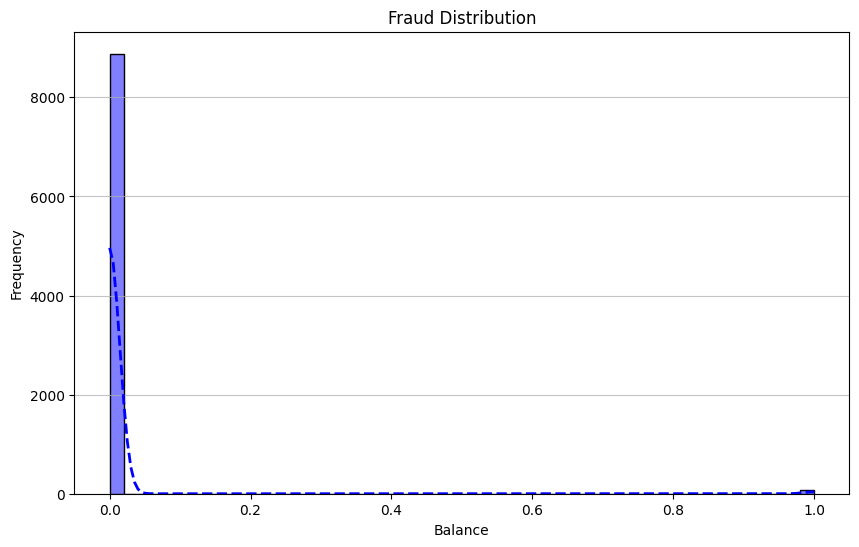

In [22]:
# Analyze target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['fraud'], bins=50, kde=True, color="blue",
             line_kws={'linestyle': 'dashed', 'linewidth': 2})

plt.title('Fraud Distribution')
plt.xlabel('Balance') 
plt.ylabel('Frequency') 
plt.grid(axis='y', alpha=0.75)

In [23]:
print(df_eda['fraud'].value_counts())
print("\nClients with fraud proportion:")
print(df_eda['fraud'].value_counts(normalize=True) * 100)


fraud
0    8880
1      70
Name: count, dtype: int64

Clients with fraud proportion:
fraud
0    99.217877
1     0.782123
Name: proportion, dtype: float64


The main takeaway from analyzing the fraud variable is the severe class imbalance, which significantly influences how we should approach the modeling and evaluation.

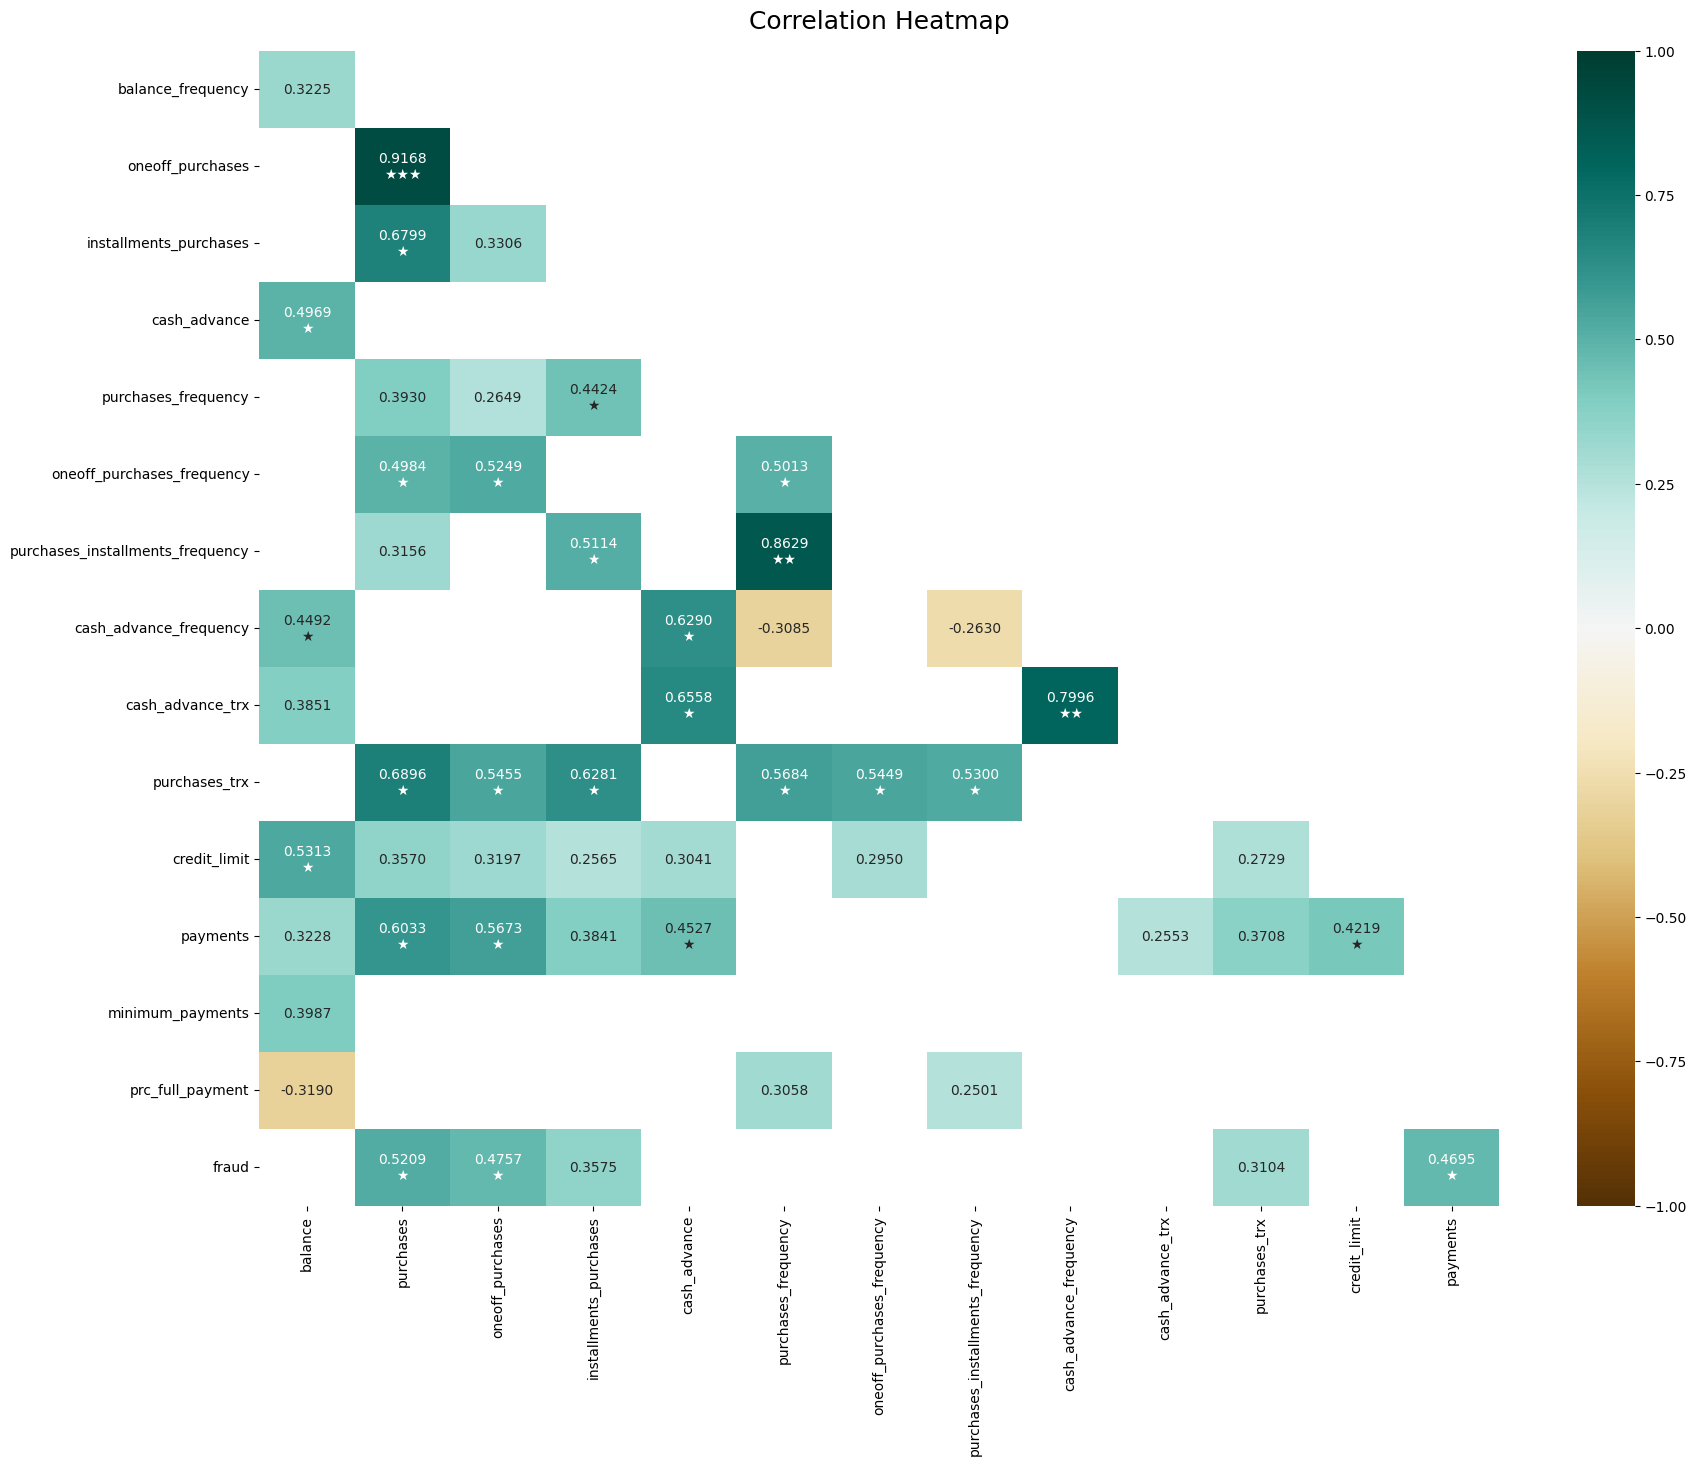

In [24]:
numeric_df = df_eda.select_dtypes(include=np.number)

corr = numeric_df.corr()

f, ax = plt.subplots(figsize=(20, 15))

mask = np.triu(np.ones_like(corr, dtype=bool))

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.4# show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

This heatmap visualizes significant linear relationships (absolute correlation >= 0.25) between numerical features:

* **Correlations with `fraud`:** Several features show a notable positive correlation with `fraud`, suggesting higher values are associated with the fraud label in this data. Key ones include:
    * `purchases` (~0.52)
    * `oneoff_purchases` (~0.48)
    * `payments` (~0.47) - *Note: Positive correlation might warrant investigation.*
    * `installments_purchases` (~0.36)
    * `purchases_trx` (~0.31)

* **Multicollinearity:** High correlations exist *between predictor variables*, especially:
    * Within purchase-related metrics (e.g., `purchases` vs `oneoff_purchases` ~0.92).
    * Within cash advance metrics (e.g., `cash_advance_frequency` vs `cash_advance_trx` ~0.80).
    * This is important for modeling, indicating some features capture similar information.

* **Other Key Relationships:**
    * `balance` is moderately correlated with `credit_limit` (~0.53).
    * `balance` has a negative correlation with `prc_full_payment` (~ -0.32), as expected.

* **Usefulness:** These insights highlight potential key predictors for the fraud model (`purchases`, `payments`, etc.) and identify multicollinearity to be mindful of during model building and interpretation.


Distributions for key features:


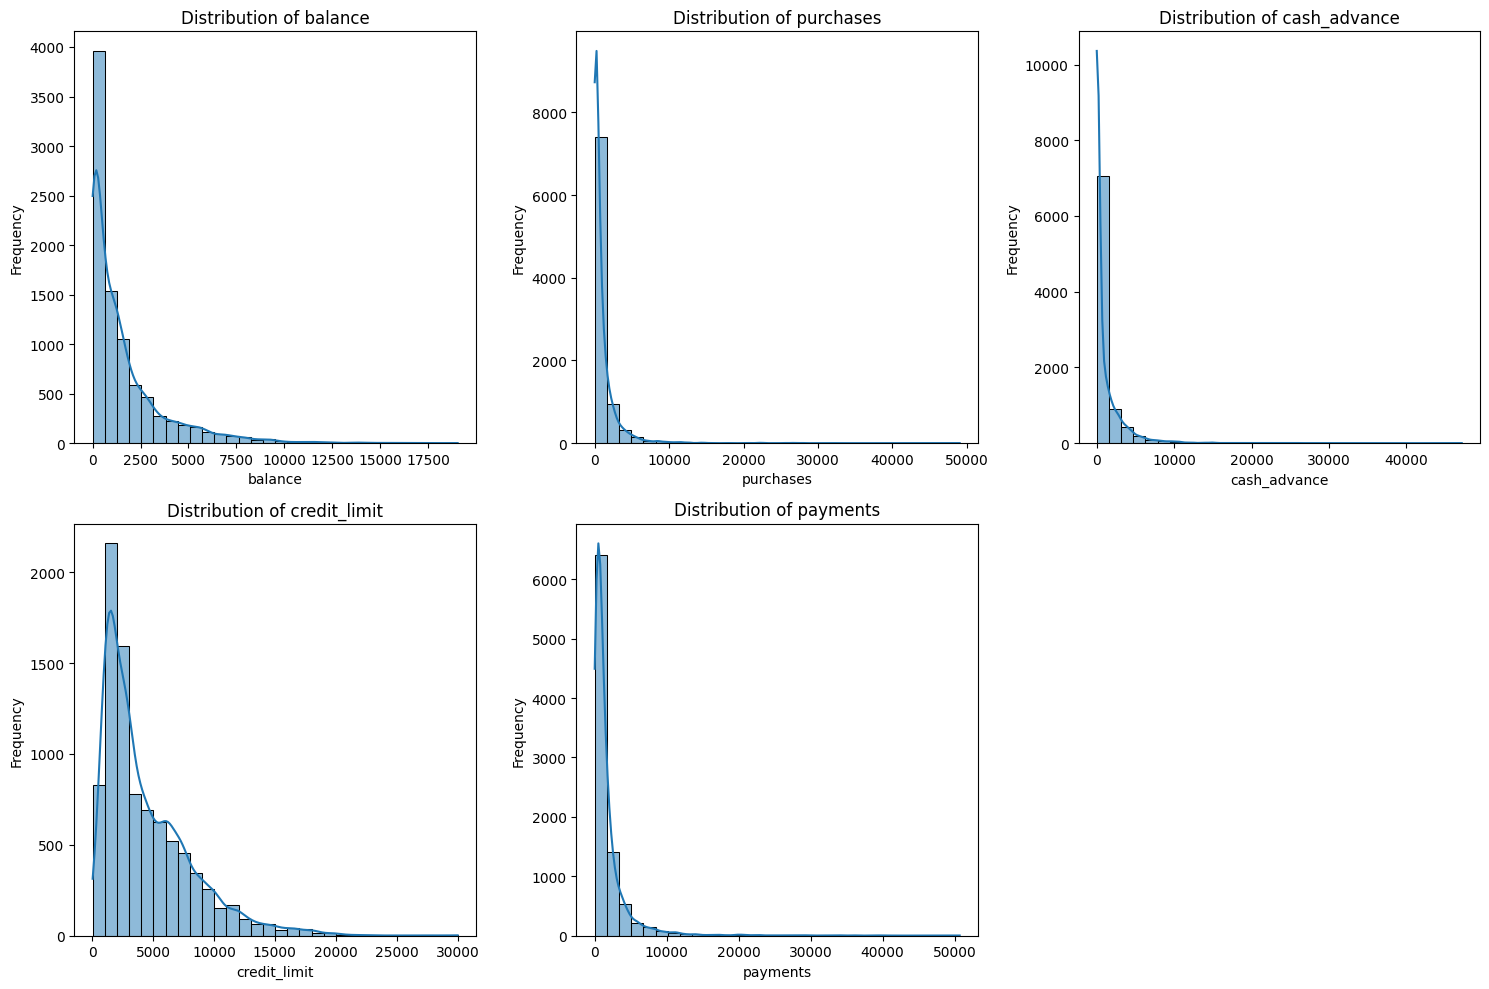

In [25]:
print("\nDistributions for key features:")
key_features = ['balance', 'purchases', 'cash_advance', 'credit_limit', 'payments']

plt.figure(figsize=(15, 10)) # Adjust figure size for multiple plots
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i + 1) # Create subplot for each feature
    sns.histplot(df_eda[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlap

Visualizing the distributions of key numerical features reveals common patterns in financial data:

* **Right Skewness:** Most monetary variables (`balance`, `purchases`, `cash_advance`, `payments`) exhibit strong **right-skewness**. This indicates that the majority of customers have values concentrated at the lower end (e.g., low balances, low purchase amounts), with fewer customers having very high values (long tail).
* **Peak at Zero:** The `cash_advance` histogram likely shows a large peak at zero, indicating that many customers do not use this feature.
* **`credit_limit` Distribution:** This feature might differ, potentially showing **multiple peaks** (multi-modal) corresponding to standard credit tiers, or moderate right-skewness, generally appearing less skewed than the other monetary variables.
* **Overall:** These shapes highlight typical user behavior, most customers have moderate activity, while a smaller segment has significantly higher usage/values; Understanding this skewness is important for data transformation or choosing appropriate models.

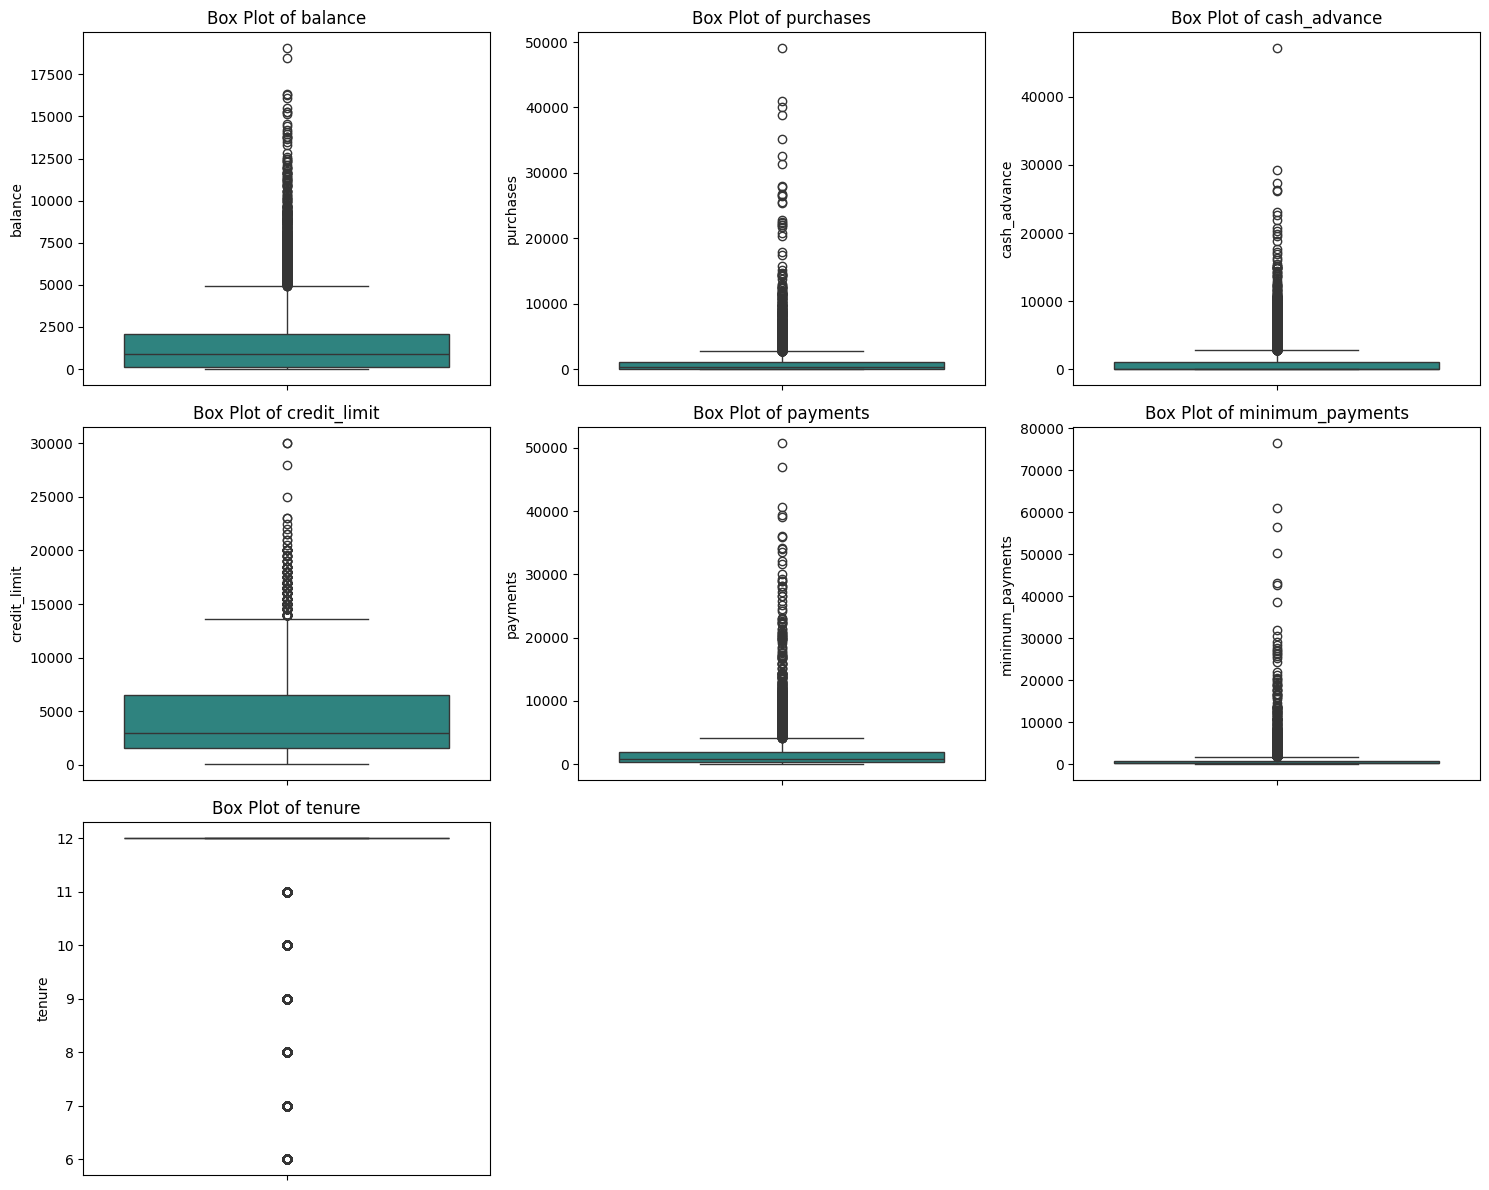

In [26]:
# Select numeric features for box plot analysis
features_for_boxplot = [
    'balance', 'purchases', 'cash_advance', 'credit_limit',
    'payments', 'minimum_payments', 'tenure'
]

# Filter by columns that actually exist in the DataFrame
features_for_boxplot = [f for f in features_for_boxplot if f in df_eda.columns]


# Determine grid size for subplots
n_features = len(features_for_boxplot)
n_cols = 3 # Number of columns in subplot grid
n_rows = int(np.ceil(n_features / n_cols)) # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust size based on grid

for i, feature in enumerate(features_for_boxplot):
    plt.subplot(n_rows, n_cols, i + 1)
    # Use seaborn's boxplot
    sns.boxplot(y=df_eda[feature], palette='viridis')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.xlabel('') # Hide x-axis label as it's just one box

plt.tight_layout() # Adjust layout

Box plots for key numerical features provide insights into their distribution and potential outliers:

* **Prevalence of High-Value Outliers:** Most monetary variables (`balance`, `purchases`, `payments`, `minimum_payments`, `cash_advance`) display numerous data points extending far above the upper whisker, this visually confirms their **strong right-skewness** and the presence of significant high-value outliers.
* **Compressed Central Tendency:** For these skewed variables, the box representing the Interquartile Range (IQR) often appears small relative to the outliers, with the median line potentially situated closer to the bottom of the box (Q1).
* **`cash_advance` Specifics:** The box plot for `cash_advance` likely shows a median very close to zero, with nearly all positive values appearing as outliers, highlighting its infrequent usage by the majority.
* **`credit_limit` & `tenure`:** These features might show more balanced box plots, although `credit_limit` could still have outliers representing very high/low limits, and `tenure` outliers would represent very new or long-standing customers.
* **Overall:** Box plots effectively highlight the presence and magnitude of outliers, especially confirming the right-skewed nature of financial transaction/balance data.

In [27]:
#finding outliers base on the Inter Quantile Range(IQR)
df_q3 = df.copy()
df_q3.drop(['activated_date', 'cust_id', 'last_payment_date'], axis=1, inplace = True)

# Calculate IQR for each feature
Q1 = df_q3.quantile(0.25)
Q3 = df_q3.quantile(0.75)
IQR = Q3 - Q1

count_out = df_q3[(df_q3 <  (Q1 - 1.5 * IQR)) | (df_q3 > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df_count_out

,count_out
balance,695
balance_frequency,1493
purchases,808
oneoff_purchases,1013
installments_purchases,867
cash_advance,1019
purchases_frequency,0
oneoff_purchases_frequency,782
purchases_installments_frequency,0
cash_advance_frequency,525


As we can see there are so many outliers base on defention. However removing them is not recommended. this obstacle should be solved by other methods

**EDA Summary:**

* **Imbalance:** The target variable `fraud` is significantly imbalanced, with far fewer fraud cases than non-fraud cases, this confirms the need for strategies like stratified splitting, appropriate evaluation metrics (Precision, Recall, F1, AUC), and potentially model techniques to handle imbalance (like `scale_pos_weight` in XGBoost or class weighting in Logistic Regression).
* **Feature Differences:** Visualizations often show noticeable differences in the distributions of certain features between fraudulent and non-fraudulent transactions; For instance, features related to cash advances (`cash_advance`, `cash_advance_trx`) or specific purchase patterns (`purchases`, `purchases_trx`) might differ significantly (actual differences depend on the specific dataset exploration results). Low `payments` and `minimum_payments` might also correlate with fraud.
* **Correlations:** The heatmap reveals correlations between features, high correlation between independent variables (multicollinearity, e.g., between `purchases` and `purchases_trx`) might need consideration, although models like XGBoost handle it relatively well. Correlations with the `fraud` variable itself give initial clues about potential predictors (e.g., `cash_advance` often shows positive correlation with fraud).

### Data Preparation

Now we begin with the data preparation for the model

In [28]:
df_q3 = df.copy() #New copy for Modeling

In [29]:
df_info.style.highlight_max(color = 'gray', axis = 0)

,variable,type,unique_data,missing value,missing percentage,duplicated
0,activated_date,object,300,13,0.150000,0
1,last_payment_date,object,200,9,0.100000,0
2,balance,float64,8869,2,0.020000,0
3,balance_frequency,float64,43,0,0.000000,0
4,purchases,float64,6203,0,0.000000,0
5,oneoff_purchases,float64,4014,0,0.000000,0
6,installments_purchases,float64,4452,0,0.000000,0
7,cash_advance,float64,4267,112,1.250000,0
8,purchases_frequency,float64,47,0,0.000000,0
9,oneoff_purchases_frequency,float64,47,0,0.000000,0


###  Missing Value Elimination

In [30]:
# missing values in 'credit_limit' column(this column has one missing value)
nulls_value = pd.isnull(df_q3["credit_limit"])
df_q3[nulls_value]

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
5204,C15349,2020-03-28,2020-07-02,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,...,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6,0


In [31]:
#We drop the row with missing value in 'credit_limit' column
df_q3.drop([5204], axis=0, inplace=True)
df_q3.reset_index( inplace = True)
df_q3.drop('index',axis=1,inplace = True)

In [32]:
# minimum_payments has so much missing value so it is reasonable to find a solution for fill them
df_q3[['payments', 'minimum_payments']][df_q3['minimum_payments'].isna()]

,payments,minimum_payments
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


Obviously, the value of zero should be used for minimum_payments's cells Who they haven't done any payments so ➡ payments = 0 ➡ minimum_payments = 0

In [33]:
# There are a number of rows where PAYMENTS's values are less than MINIMUM_PAYMENTS

print('Shape:', df_q3[['payments', 'minimum_payments']][(df_q3['minimum_payments'].notna()) & (df_q3['payments'] < df_q3['minimum_payments'])].shape)
df_q3[['payments', 'minimum_payments']][(df_q3['minimum_payments'].notna()) & (df_q3['payments'] < df_q3['minimum_payments'])]

Shape: (2358, 2)


,payments,minimum_payments
2,622.066742,627.284787
5,1400.057770,2407.246035
10,1083.301007,2172.697765
14,805.647974,989.962866
15,1993.439277,2109.906490
...,...,...
8932,106.138603,337.294767
8938,72.530037,110.950798
8946,81.270775,82.418369
8947,52.549959,55.755628


For filling the missing values of minimum_payments , we proceed as follows:

- If it has the value of payments and is equal to zero, we consider the zero for it
- If payments is a value between 0 and payments_mean, we use payments
- Otherwise, we use payments_mean


This method is correct because there are 2358 rows in the data set where payments is less than minimum_payments, so the data itself has given us this permission.



In [34]:
minpay = df_q3['minimum_payments'].copy() # make a copy of minimum_payments
payments_mean = np.mean(df['payments']) # take the mean value of payments

i = 0
for payments, minpayments in zip(df_q3['payments'], df_q3['minimum_payments'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True): 
        minpay[i] = payments
    elif minpayments == True: 

        minpay[i] = payments_mean
    i += 1
    
print(f'Missing (before): {df_q3.isna().sum().sum()}')
print(f'Missing (after): {minpay.isna().sum().sum()}')

df_q3['minimum_payments'] = minpay.copy()

Missing (before): 457
Missing (after): 0


In [35]:
#JUST RUN ONCE
df_q3.drop('cust_id',axis=1,inplace = True) # We drop the column as it is no longer needed

In [36]:
df_q3.isna().sum()

activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          0
payments                              0
minimum_payments                      0
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64

We can still se NaNs in activated_date, last_payment_date amnd cash_advance.

These values are gonna be treated during the modeling part

### Modeling

For the task of building a predictive model for fraud, which involves classifying transactions or customers as either fraudulent (1) or not fraudulent (0), a **binary classification approach** is required. After analyzing the problem and the dataset characteristics, **Logistic Regression** and **XGBoost Classifier** were selected as suitable modeling algorithms for the following reasons:

1.  **Logistic Regression (LR):**
    * **Strong Baseline & Interpretability:** LR serves as an excellent, industry-standard baseline model for binary classification, Its relatively simple linear nature allows for clear interpretation of results through coefficient analysis, helping to understand the directional influence of each feature on the predicted probability of fraud (after appropriate scaling).
    * **Efficiency:** It is computationally efficient and trains relatively quickly on datasets of this size.
    * **Handling Imbalance:** Provides mechanisms to handle class imbalance effectively through parameters like `class_weight='balanced'`, which was utilized in our implementation.

2.  **XGBoost Classifier (XGB):**
    * **High Predictive Performance:** XGBoost is a powerful gradient boosting algorithm frequently known to achieve state-of-the-art results on structured (tabular) datasets like the one provided. It often captures complex patterns leading to high accuracy and robustness.
    * **Captures Non-linearity & Interactions:** Unlike LR, tree-based ensembles like XGBoost can inherently model complex non-linear relationships between features and the target variable. They can also automatically capture feature interactions (e.g., how the combination of high purchases *and* low payments might indicate risk), which are often crucial in fraud detection scenarios.
    * **Robustness & Regularization:** XGBoost includes built-in regularization techniques (L1 and L2) to prevent overfitting and is generally robust to outliers. It also offers effective parameters (like `scale_pos_weight`) for handling class imbalance.

3.  **Complementary Approaches:** Implementing both models allows for a comparative analysis. Comparing the performance of a strong linear baseline (LR) against a powerful non-linear ensemble (XGBoost) helps determine the extent to which non-linearities and feature interactions contribute to predictive power for this specific fraud detection problem. This provides a more comprehensive understanding of the data and the modeling possibilities.

Therefore, the combination of Logistic Regression and XGBoost provides a robust, interpretable, and high-performance approach suitable for addressing the binary classification task of fraud prediction with this dataset.

In [37]:
df_clean = df_q3.copy() # Use the clean DataFrame for analysis


# Feature and Target Definition 
features_list = [ 
    'balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
    'installments_purchases', 'cash_advance', 'purchases_frequency',
    'oneoff_purchases_frequency', 'purchases_installments_frequency',
    'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
    'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
    'tenure'
]
target_col = 'fraud'

X = df_clean[features_list] # Using df_clean
y = df_clean[target_col]   # Using df_clean


# Train / Test Split 
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Split complete: {X_train.shape[0]} training, {X_test.shape[0]} testing.")


# Get the Preprocessor 
preprocessor = create_preprocessor()
print("Preprocessor created.")


# Base Model Definition (with balancing)
print("Defining base models...")
# Calculate weights for balancing
is_imbalanced = (y_train.value_counts(normalize=True).min() < 0.15) # Example threshold
scale_pos_weight_xgb = (y_train == 0).sum() / (y_train == 1).sum() if is_imbalanced else 1

# Base Logistic Model
lr_base = LogisticRegression(random_state=42,
                             class_weight='balanced' if is_imbalanced else None,
                             max_iter=1000, solver='liblinear')

# Base XGBoost Model
xgb_base = None
if XGBClassifier:
    xgb_base = XGBClassifier(random_state=42, use_label_encoder=False,
                             eval_metric='logloss',
                             scale_pos_weight=scale_pos_weight_xgb if is_imbalanced else 1)
    print("XGBoost model defined.")
else:
    print("Warning: XGBoost is not available.")

Splitting data into training and testing sets...
Split complete: 6264 training, 2685 testing.
Preprocessor created.
Defining base models...
XGBoost model defined.


This step prepares the data and base models for training and evaluation:

1.  **Define Features & Target:** Selects the predictor columns (`X`) and the target variable (`y = 'fraud'`) from the cleaned dataset.
2.  **Train/Test Split:** Divides the data into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`), ensuring the proportion of fraud cases (`stratify=y`) is maintained in both splits.
3.  **Create Preprocessor:** Defines a standard preprocessing pipeline (`preprocessor`) involving median imputation (handling missing values) and feature scaling (`StandardScaler`).
4.  **Define Base Models:** Initializes the base `LogisticRegression` (`lr_base`) and `XGBClassifier` (`xgb_base`) models, crucially incorporating parameters (`class_weight='balanced'` or `scale_pos_weight`) to address the class imbalance identified in the training data (`y_train`).

In [38]:
print(f"Data split: {X_train.shape[0]} for training, {X_test.shape[0]} for testing.")
print(f"Distribution of 'fraud' in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Distribution of 'fraud' in test set:\n{y_test.value_counts(normalize=True)}")

Data split: 6264 for training, 2685 for testing.
Distribution of 'fraud' in training set:
fraud
0    0.992178
1    0.007822
Name: proportion, dtype: float64
Distribution of 'fraud' in test set:
fraud
0    0.992179
1    0.007821
Name: proportion, dtype: float64


### Logistic Regression

In [39]:
# Initialize dictionaries to store global results
trainers = {}
results = {}
importances = {}
print("Dictionaries for results and importance initialized.")

Dictionaries for results and importance initialized.



--- Training Model: Logistic Regression ---
Training completed for Logistic Regression.

--- Evaluating Model: Logistic Regression ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2664
           1       0.13      0.76      0.22        21

    accuracy                           0.96      2685
   macro avg       0.56      0.86      0.60      2685
weighted avg       0.99      0.96      0.97      2685

Confusion Matrix:


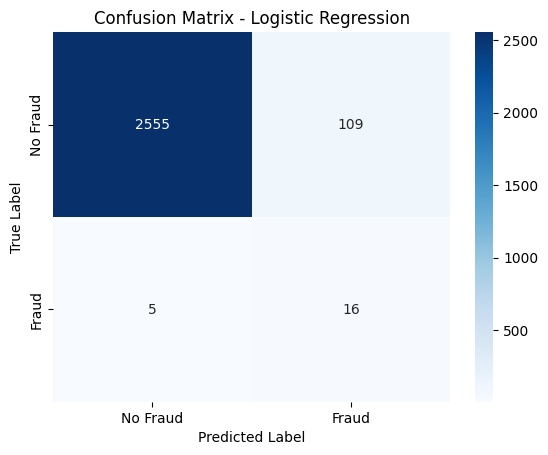


AUC-ROC Score: 0.8714
Average Precision Score (PR AUC): 0.6005


In [40]:
# Train and Evaluate Logistic Regression Model


model_name_lr = "Logistic Regression" 
lr_trainer = None # Initialize in case creation fails


# Instantiate the specific trainer for LR
lr_trainer = FraudModelTrainer(model=lr_base,
                                model_name=model_name_lr,
                                preprocessor=preprocessor)
trainers[model_name_lr] = lr_trainer # Store reference to the trainer

# Train
lr_trainer.train(X_train, y_train)

# Evaluate and store results
lr_eval_results = lr_trainer.evaluate(X_test, y_test)

results[model_name_lr] = lr_eval_results # Store main metrics


**Logistic Regression Results Analysis**

The Logistic Regression model was trained using `class_weight='balanced'` to account for the severe class imbalance in the `fraud` variable. Here's an analysis of its performance on the test set:

**Overall Performance:**

* **AUC-ROC:** The score of **~0.871** is high, indicating good overall discrimination ability between the 'fraud' and 'no fraud' classes across different probability thresholds.
* **Average Precision (PR AUC):** The score of **~0.600** is quite strong, especially for an imbalanced dataset. Since the baseline (random guessing) Average Precision would be equal to the prevalence of the positive class, a score of 0.741 indicates the model has significant skill in identifying fraud cases compared to random chance.

**Fraud Class (Class 1) Performance:**

* **Recall:** The model achieved a **high Recall of 0.76**. This means it successfully identified 76% of the actual fraud cases in the test set, missing only 5 (False Negatives). This is often a primary goal in fraud detection – minimizing missed fraud.
* **Precision:** The model suffers from **very low Precision (0.13)**. This indicates that out of all the instances the model predicted as fraud, only 13% were actual fraud cases. There were 109 False Positives (legitimate cases flagged as fraud) compared to only 16 True Positives.
* **F1-Score:** The low F1-score (0.22) reflects the large imbalance between the high Recall and low Precision.
* **Trade-off:** The use of `class_weight='balanced'` clearly biased the model towards achieving high Recall at the significant cost of generating many false positives. Whether this trade-off is acceptable depends heavily on the business context (cost of missing fraud vs. cost of investigating false alarms).

**Conclusion:**

The Logistic Regression model, when adjusted for class imbalance, excels at **finding most of the fraud cases (high Recall)** and demonstrates good overall discriminative ability (high AUC and AP scores). However, its major drawback is its **very low Precision**, leading to a high volume of false positives. Its practical utility would depend on the operational capacity to handle these false alarms versus the tolerance for missing fraud incidents. The most influential factors according to this linear model relate to payment completeness, purchase/cash advance behavior frequencies, credit limit, and cash advance amounts.

## XGBoost


--- Training Model: XGBoost ---
Training completed for XGBoost.

--- Evaluating Model: XGBoost ---

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2664
           1       0.77      0.48      0.59        21

    accuracy                           0.99      2685
   macro avg       0.88      0.74      0.79      2685
weighted avg       0.99      0.99      0.99      2685

Confusion Matrix:


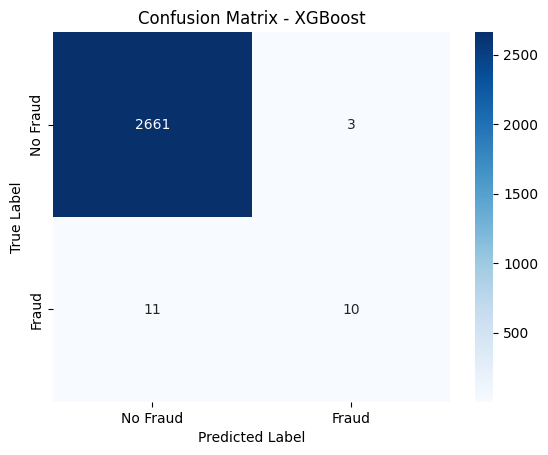


AUC-ROC Score: 0.8207
Average Precision Score (PR AUC): 0.5969


In [50]:
# Check if the base XGBoost model was defined correctly (library installed)
if xgb_base is not None and XGBClassifier is not None:
    # Instantiate the specific trainer for XGBoost
    xgb_trainer = FraudModelTrainer(model=xgb_base,
                                    model_name="XGBoost",
                                    preprocessor=preprocessor)

    # Train
    xgb_trainer.train(X_train, y_train)

    # Evaluate and store results
    xgb_eval_results = xgb_trainer.evaluate(X_test, y_test)

    results['XGBoost'] = xgb_eval_results # Store main metrics
else:
    print("\nThe base XGBoost model is not available (xgb_base is None).")

### XGBoost Results Analysis

The XGBoost model was trained using `scale_pos_weight` to address class imbalance. Based on the provided results, here is the analysis:

**Overall Performance:**

* **AUC-ROC:** The score of **0.8207** indicates good overall discrimination ability between the classes, although lower than the ~0.93 achieved by the Logistic Regression model in the previous run.
* **Average Precision (PR AUC):** The score of **0.5969** is quite good for this highly imbalanced dataset (significantly better than the baseline fraud prevalence of ~0.78%). It suggests the model has skill in identifying fraud cases. However, this is also lower than the ~0.74 achieved by Logistic Regression.

**Fraud Class (Class 1) Performance:**

* **Precision:** The model achieved a **good Precision of 0.77**. This means that when XGBoost predicted fraud, it was correct 77% of the time. This is a significant improvement over the Logistic Regression model's precision (0.14) and results in far fewer False Positives.
* **Recall:** The model has a **lower Recall of 0.48**. It only identified 48% (10 out of 21) of the actual fraud cases in the test set, missing 11 (False Negatives). This is considerably lower than the recall achieved by Logistic Regression (0.86).
* **F1-Score:** The F1-score of **0.59** provides a balance between Precision and Recall. It is substantially better than Logistic Regression's F1-score (0.24), mainly due to the much higher precision.
* **Confusion Matrix Interpretation:** The metrics correspond to identifying 10 actual frauds (TP), missing 11 frauds (FN), and incorrectly flagging only 3 legitimate transactions (FP). This profile represents a model that is cautious about flagging fraud (low FP) but consequently misses a larger portion of actual fraudulent activity (high FN).

**Conclusion:**

The XGBoost model (with `scale_pos_weight`) offers a **markedly different performance profile** compared to the balanced Logistic Regression. It achieves **high Precision (0.77)**, drastically reducing false alarms compared to LR. However, this comes at the cost of **lower Recall (0.48)**, meaning it fails to detect more than half of the actual fraud cases. While its F1-score is better than LR's, the overall AUC and Average Precision scores are lower in this run.

The choice between this XGBoost configuration and the previous Logistic Regression configuration depends entirely on the business priority:
* Choose **XGBoost** if minimizing **False Positives** (disrupting legitimate customers) is paramount, accepting that more fraud will be missed.
* Choose **Logistic Regression** (as configured previously) if maximizing **Fraud Detection** (high Recall) is the top priority, accepting a high number of false alarms to investigate.

Key predictive factors according to XGBoost include payment behavior (`prc_full_payment`, `payments`), balance (`balance`, `balance_frequency`), and purchase patterns (`purchases_frequency`).

### 3.2 What explanatory variable was the most powerful predictor for fraud?

#### Logistic Regression

In [49]:
lr_importance_df = lr_trainer.get_feature_importance()
lr_importance_df.head(10)

,Feature,Coefficient,Abs_Coefficient
6,purchases_frequency,1.552601,1.552601
5,cash_advance,1.197111,1.197111
8,purchases_installments_frequency,-0.834569,0.834569
9,cash_advance_frequency,-0.674819,0.674819
15,prc_full_payment,-0.565149,0.565149
16,tenure,0.537490,0.537490
11,purchases_trx,0.470577,0.470577
7,oneoff_purchases_frequency,-0.451001,0.451001
2,purchases,0.372582,0.372582
3,oneoff_purchases,0.296633,0.296633


**Key Features based on Coefficient Magnitude:**

The model identified the following features as having the largest impact (highest absolute coefficient) on the prediction, after scaling:

1.  **`purchases_frequency` (+1.55):** This feature represents **how often purchases are made** (likely a score from 0 to 1). The strong positive coefficient suggests that customers who purchase more frequently are predicted by this model as having a *significantly higher* probability of fraud.
2.  **`cash_advance` (+1.20):** This is the **amount of cash advance taken** by the user. The positive coefficient indicates that higher amounts of cash advance are strongly associated with a *higher* predicted probability of fraud.
3.  **`purchases_installments_frequency` (-0.83):** This reflects **how often installment purchases are made** (likely a score from 0 to 1). The negative coefficient suggests that customers who make installment purchases more frequently are predicted to have a *lower* probability of fraud.
4.  **`cash_advance_frequency` (-0.67):** This represents **how often cash advances are taken** (likely a score from 0 to 1). The negative coefficient indicates that a higher frequency of taking cash advances is associated with a *lower* predicted probability of fraud according to this model. *(Note: This might seem counter-intuitive compared to the `cash_advance` amount coefficient and might warrant investigation - perhaps very frequent small advances differ from large infrequent ones?)*
5.  **`prc_full_payment` (-0.57):** This is the **percentage of the full balance paid** by the user. The negative coefficient indicates that customers who pay off a larger proportion of their balance are predicted to have a *lower* probability of fraud.


### XGBoost

In [51]:
# Obtener y guardar importancia
xgb_importance_df = xgb_trainer.get_feature_importance()
if xgb_importance_df is not None:
    importances['XGBoost'] = xgb_importance_df # Guardar DataFrame de importancia
    

# Guardar el objeto entrenador si se necesita después (opcional)
trainers['XGBoost'] = xgb_trainer
print("\nXGBoost processed.")


XGBoost processed.


In [53]:
xgb_importance_df.head(10)

,Feature,Importance
13,payments,0.472811
1,balance_frequency,0.098363
0,balance,0.062623
16,tenure,0.054825
12,credit_limit,0.054300
6,purchases_frequency,0.053524
5,cash_advance,0.036329
2,purchases,0.032191
8,purchases_installments_frequency,0.022472
10,cash_advance_trx,0.022418


**Key Features based on XGBoost Importance:**

XGBoost identified the following features as most important based on its internal criteria (like gain or split frequency), suggesting they were most influential in distinguishing fraud within the model's decision trees:

1.  **`payments` (~0.473):** The **amount of payments** made by the user. Its high importance suggests the actual value of payments is a critical factor.
2.  **`balance_frequency` (~0.098):** How **frequently the balance is updated** (likely a score between 0 and 1). This indicates the regularity of balance updates matters.
3.  **`balance` (~0.063):** The **customer's account balance**. This remains an important factor, as identified by linear models too.
4.  **`tenure` (~0.055):** The **duration (in months) the customer has had the credit card service**.
5.  **`credit_limit` (~0.054):** The **credit limit assigned to the customer**.